### Генератор матриц

In [29]:
import numpy as np
import os

def generate_matrix(rows, cols, min_val=0, max_val=10, filename="matrix.txt"):
    mat = np.random.randint(min_val, max_val + 1, size=(rows, cols))
    with open(filename, "w") as f:
        f.write(f"{rows} {cols}\n")
        for row in mat:
            f.write(" ".join(str(x) for x in row) + "\n")

lab_dir = "matrix"
os.makedirs(lab_dir, exist_ok=True)

sizes = range(100, 1100, 100)
for n in sizes:
    pathA = os.path.join(lab_dir, f"matrixA_{n}.txt")
    pathB = os.path.join(lab_dir, f"matrixB_{n}.txt")
    generate_matrix(n, n, 1, 10, pathA)
    generate_matrix(n, n, 1, 10, pathB)
    print(f"Created files: {pathA}, {pathB}")


Created files: matrix\matrixA_100.txt, matrix\matrixB_100.txt
Created files: matrix\matrixA_200.txt, matrix\matrixB_200.txt
Created files: matrix\matrixA_300.txt, matrix\matrixB_300.txt
Created files: matrix\matrixA_400.txt, matrix\matrixB_400.txt
Created files: matrix\matrixA_500.txt, matrix\matrixB_500.txt
Created files: matrix\matrixA_600.txt, matrix\matrixB_600.txt
Created files: matrix\matrixA_700.txt, matrix\matrixB_700.txt
Created files: matrix\matrixA_800.txt, matrix\matrixB_800.txt
Created files: matrix\matrixA_900.txt, matrix\matrixB_900.txt
Created files: matrix\matrixA_1000.txt, matrix\matrixB_1000.txt


### Верификация результатов

In [31]:
import numpy as np
import os

def read_matrix(filename):
    with open(filename) as f:
        rows, cols = map(int, f.readline().split())
        data = []
        for _ in range(rows):
            data.append(list(map(float, f.readline().split())))
        return np.array(data)

sizes = range(100, 1100, 100)
matrix_dir = "matrix"
errors = 0

for n in sizes:
    fileA = os.path.join(matrix_dir, f"matrixA_{n}.txt")
    fileB = os.path.join(matrix_dir, f"matrixB_{n}.txt")
    fileC = os.path.join(matrix_dir, f"matrixC_{n}.txt")
    try:
        A = read_matrix(fileA)
        B = read_matrix(fileB)
        C_cpp = read_matrix(fileC)
        C_py = A @ B
        if np.allclose(C_cpp, C_py):
            print(f"Verification successful for size {n}: results match.")
        else:
            print(f"Error: results do not match for size {n}!")
            errors += 1
    except Exception as e:
        print(f"Error verifying size {n}: {e}")
        errors += 1

if errors == 0:
    print("All verifications successful!")
else:
    print(f"Total errors: {errors}")

Verification successful for size 100: results match.
Verification successful for size 200: results match.
Verification successful for size 300: results match.
Verification successful for size 400: results match.
Verification successful for size 500: results match.
Verification successful for size 600: results match.
Verification successful for size 700: results match.
Verification successful for size 800: results match.
Verification successful for size 900: results match.
Verification successful for size 1000: results match.
All verifications successful!


lab_results: defaultdict(<class 'list'>, {'lab1': [(100, 12.6373), (200, 104.174), (300, 364.236), (400, 857.502), (500, 1577.31), (600, 2697.95), (700, 4284.97), (800, 6512.5), (900, 9349.47), (1000, 12709.5)], 'lab2': [(100, 3.8054), (200, 30.2788), (300, 92.2357), (400, 148.81), (500, 290.175), (600, 527.602), (700, 812.932), (800, 1189.42), (900, 1980.81), (1000, 2491.26)]})


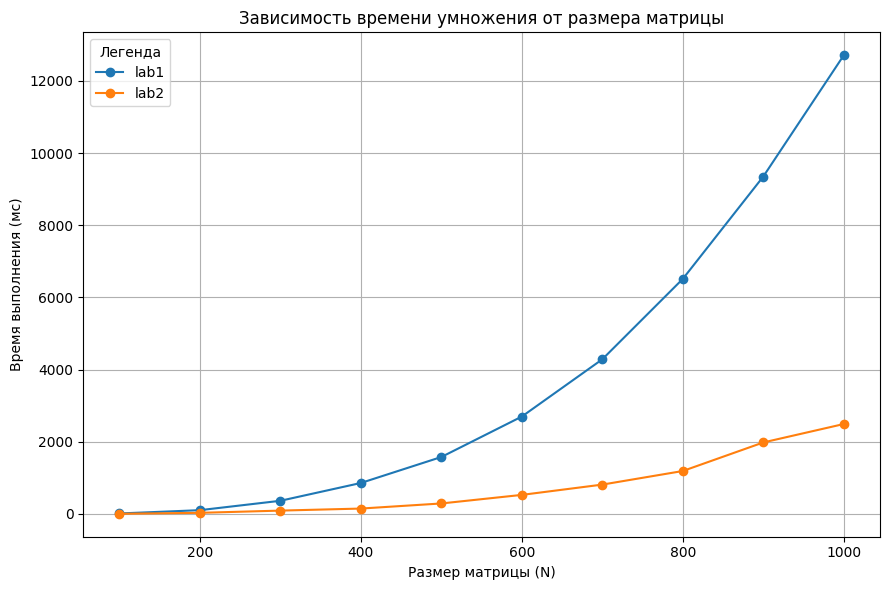

In [35]:
import matplotlib.pyplot as plt
import re
import glob
from collections import defaultdict

lab_results = defaultdict(list)

for fname in glob.glob('lab*/results_lab*.txt'):
    lab_match = re.match(r'(lab\d+)[/\\]results_lab\d+\.txt', fname)
    if not lab_match:
        print(f"Не распознан путь: {fname}")
        continue
    lab = lab_match.group(1)
    with open(fname) as f:
        for line in f:
            m = re.match(r"Matrix size: (\d+)x\d+ \* (\d+)x\d+ \| Execution time: ([\d.]+) ms", line)
            if m:
                size = int(m.group(1))
                time = float(m.group(3))
                lab_results[lab].append((size, time))

print("lab_results:", lab_results)

plt.figure(figsize=(9,6))

for lab, data in sorted(lab_results.items()):
    if not data:
        continue
    data.sort()
    sizes = [r[0] for r in data]
    times = [r[1] for r in data]
    plt.plot(sizes, times, marker='o', label=lab)

plt.xlabel('Размер матрицы (N)')
plt.ylabel('Время выполнения (мс)')
plt.title('Зависимость времени умножения от размера матрицы')
plt.legend(title="Легенда")
plt.grid(True)
plt.tight_layout()
plt.show()
